In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from IPython.display import Image, display
from scipy.stats import t

In [2]:
# Use the following data for this assignment:
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


## Plan

1) Create a Dataset

2) Find (mean) and (std) as Series

3) Find the confidence intervals for sample (use t-destribution and 95% confidence

4) Plot the Bar chart

5) Set the Threshold (horizontal line on the Chart)

6) Create a colormap, the list of percents [0:1] 0.5-white color, when threshold = bar mean) 

7) Compare each bar to a fixed value. The user can move the line.

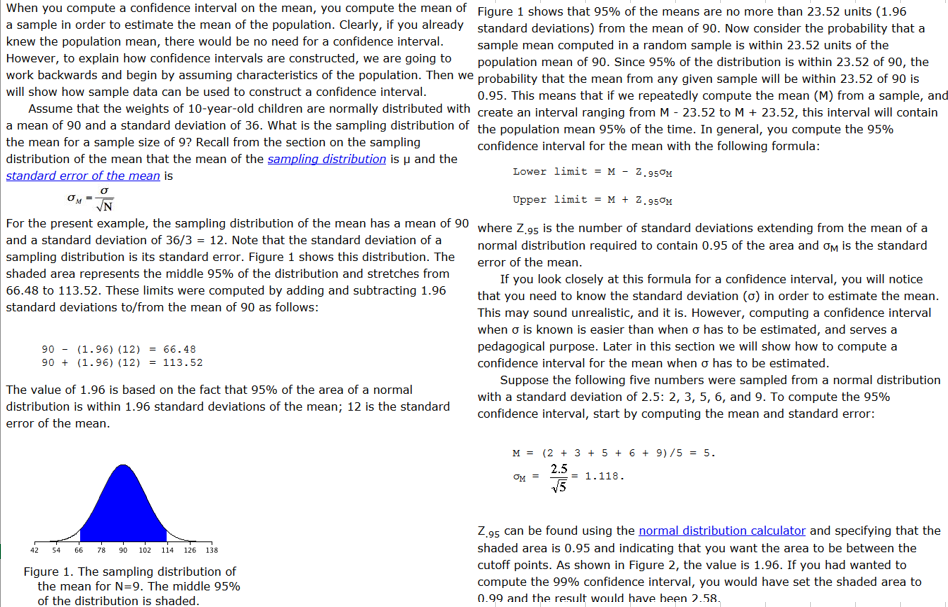

In [3]:
display(Image(filename='1.PNG', embed=True, width=1000))

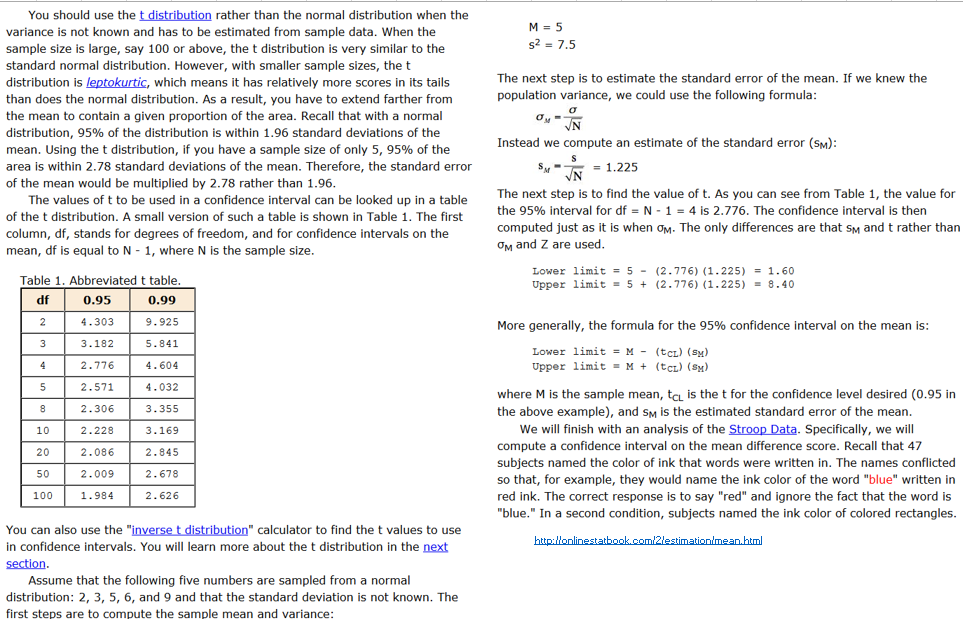

In [4]:
display(Image(filename='2.PNG', embed=True, width=1000))

In [5]:
mn = df.mean(axis=1)
sd = df.std(axis=1)

In [6]:
yerr = sd/np.sqrt(df.shape[1]) * t.ppf(1-0.05/2, df.shape[1]-1)

<IPython.core.display.Javascript object>


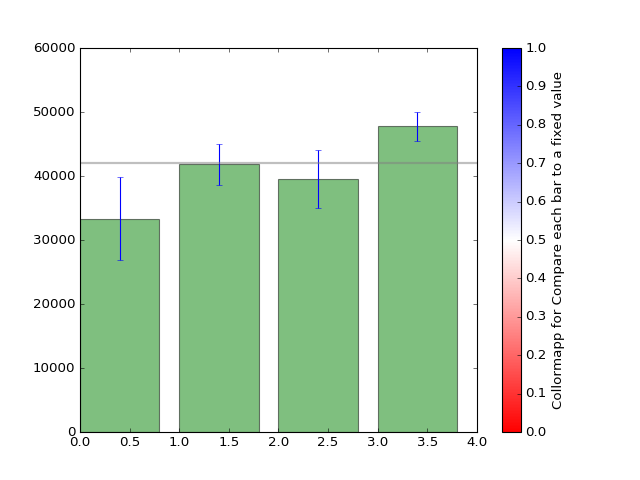

In [7]:
plt.figure()
plt.show()
bars = plt.bar(range(df.shape[0]), mn, yerr = yerr.values, color = 'green', alpha=0.5)

In [8]:
threshold=42000
# Horizontal line on the bar chart
plt.axhline(y = threshold, color = 'grey', alpha = 0.5, linewidth = 2)

In [9]:
import matplotlib.colors as mcol
import matplotlib.cm as cm
# https://stackoverflow.com/questions/25748183/python-making-color-bar-that-runs-from-red-to-blue

In [10]:
# Make a user-defined colormap.
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["r","white", "b"])
cpick = cm.ScalarMappable(cmap=cm1)
cpick.set_array([])
cpick

In [11]:
# Create a list with colors according to percentage 
c_map = []
# find the place of 
for bar, yerr_ in zip(bars, yerr):
    low = bar.get_height() - yerr_
    high = bar.get_height() + yerr_
    percentage = (high-threshold)/(high-low)
    if percentage>1: percentage = 1
    if percentage<0: percentage=0
    c_map.append(percentage)
c_map

[0, 0.47836996017248118, 0.22486128520509924, 1]

In [12]:
#The following colorbar is shown on the previous bar chart as an example
plt.colorbar(cpick,label="Collormapp for Compare each bar to a fixed value")

#### RGBA color values are an extension of RGB color values with an alpha channel - which specifies the opacity for a color.

#### An RGBA color value is specified with: rgba(red, green, blue, alpha). The alpha parameter is a number between 0.0 (fully transparent) and 1.0 (fully opaque).

In [13]:
# Create a rgba code_color for each bar in the plot (red, green, blue, alpha)
cpick.to_rgba(c_map)

array([[ 1.        ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.95686275,  0.95686275,  1.        ],
       [ 1.        ,  0.44705882,  0.44705882,  1.        ],
       [ 0.        ,  0.        ,  1.        ,  1.        ]])

<IPython.core.display.Javascript object>


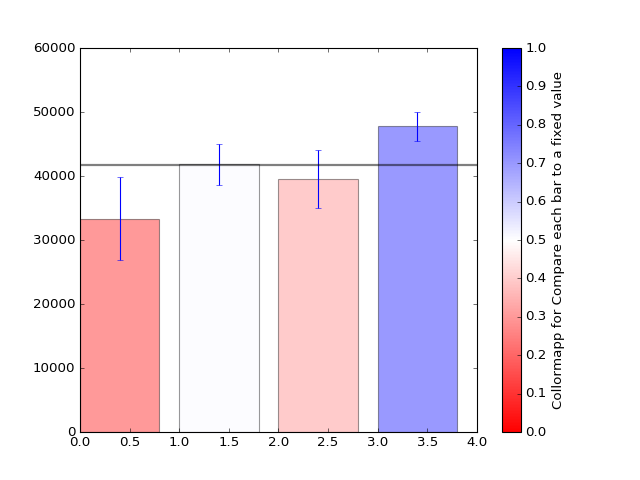

In [14]:
#fig = plt.figure()
#fig.show()

fig, ax = plt.subplots() 

bar = plt.bar(range(df.shape[0]), mn, yerr = yerr.values, color = cpick.to_rgba(c_map), alpha=0.4)
plt.colorbar(cpick,label="Collormapp for Compare each bar to a fixed value")
plt.axhline(y = threshold, color = 'black', alpha = 0.5, linewidth = 2)

In [15]:
def onclick(event):
    
    #Set the new threshold base on clicked point from Y-axis
    threshold = event.ydata
    
    # Clear the axes
    ax.clear()
    
    # Change the c_map for bar, same code as above
    c_map = []
    for bar, yerr_ in zip(bars, yerr):
        low = bar.get_height() - yerr_
        high = bar.get_height() + yerr_
        percentage = (high-threshold)/(high-low)
        if percentage>1: percentage = 1
        if percentage<0: percentage=0
        c_map.append(percentage)
        
    # Plot the new bar and threshold line
    bar = plt.bar(range(df.shape[0]), mn, yerr = yerr.values, color = cpick.to_rgba(c_map), alpha=0.4)
    plt.axhline(y = threshold, color = 'black', alpha = 0.5, linewidth = 2)
    fig.canvas.draw()

In [16]:
cid = fig.canvas.mpl_connect('button_press_event', onclick)
fig.show()